In [1]:
import math
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
### Gradient Descent with fixed stepsize
def GD_FixedStepSize(obj_f, grad_obj_f , init_point, Lip_cons, iter_list):
    Time_GD_FixedStepSize = []
    f_best_GD_FixedStepSize = []
    xk_GD_FixedStepSize = []
    fxk_GD_FixedStepSize = [obj_f(init_point)]
    norm_grad_fxk_GD_FixedStepSize = [np.linalg.norm(grad_obj_f(init_point))]
    
    for N in iteration_list:
        x = init_point                    
        k = 0

        start_time = datetime.now()

        while(True):
            k += 1
             
            ### x_{k+1}
            x1 = x - (1/Lip_cons)*grad_obj_f(x)
            
            x = x1
            
            #xk_GD_FixedStepSize.append(x1)
            fxk_GD_FixedStepSize.append(obj_f(x1))
            norm_grad_fxk_GD_FixedStepSize.append(np.linalg.norm(grad_obj_f(x1)))
                    
            if not( k < N):
                break  
                
        end_time=datetime.now()

        #values = [obj_f(s) for s in xk_GD_FixedStepSize]
        f_optim = obj_f(x1) # min(values) 

        Time_algorithm = (end_time-start_time).total_seconds()

        Time_GD_FixedStepSize.append(round(Time_algorithm, 6))
                
        f_best_GD_FixedStepSize.append(f_optim)
    
    return (f_best_GD_FixedStepSize, fxk_GD_FixedStepSize, Time_GD_FixedStepSize, norm_grad_fxk_GD_FixedStepSize)

In [3]:
### Adaptive Nesterov Gradient Descent
def Adap_GD_Nesterov(obj_f, grad_obj_f , init_point, Lip_cons, iter_list):
    Time_Adap_GD_Nesterov = []
    f_best_Adap_GD_Nesterov = []
    xk_Adap_GD_Nesterov = []
    fxk_Adap_GD_Nesterov = [obj_f(init_point)]
    norm_grad_fxk_Adap_GD_Nesterov = [np.linalg.norm(grad_obj_f(init_point))]

    for N in iteration_list:
        L0 = Lip_cons
        L = L0/2    # L_1

        x = init_point              
        
        k = 0

        start_time = datetime.now()

        while(True):
            k += 1
             
            ### x_{k+1}
            x1 = x - (1/L)*grad_obj_f(x)  
            
            if ( obj_f(x1) <= obj_f(x) + np.dot(grad_obj_f(x), x1-x) + (L/2)*sum(np.power(x1-x,2)) ):
                L = L/2               # L^(N+1)=L^N/2           
                x = x1
                #xk_Adap_GD_Nesterov.append(x1)
                #fxk_Adap_GD_Nesterov.append(obj_f(x))
            else:
                L = 2*L               # L^(N+1)=2*L^N.
                
            #xk_Adap_GD_Nesterov.append(x)
            fxk_Adap_GD_Nesterov.append(obj_f(x))
            norm_grad_fxk_Adap_GD_Nesterov.append(np.linalg.norm(grad_obj_f(x)))
                    
            if not( k < N):           # this is the stopping criterion
                break           

        end_time=datetime.now()
                
        #values = [obj_f(s) for s in xk_Adap_GD_Nesterov]
        f_optim = obj_f(x1) # min(values)
        
        Time_algorithm = (end_time-start_time).total_seconds()  

        Time_Adap_GD_Nesterov.append(round(Time_algorithm, 6))
                
        f_best_Adap_GD_Nesterov.append(f_optim)
    
    return (f_best_Adap_GD_Nesterov, fxk_Adap_GD_Nesterov, Time_Adap_GD_Nesterov, norm_grad_fxk_Adap_GD_Nesterov)

In [4]:
###  Gradient Descent with sequences stepsize
def GD_SequenceStepSize(obj_f, grad_obj_f , init_point, Lip_cons, iter_list):
    Time_GD_SequenceStepSize = []
    f_best_GD_SequenceStepSize = []
    xk_GD_SequenceStepSize = []
    fxk_GD_SequenceStepSize = [obj_f(init_point)]
    norm_grad_fxk_GD_SequenceStepSize = [np.linalg.norm(grad_obj_f(init_point))]
    
    for N in iteration_list:
        x = init_point                   
        k = 0

        start_time = datetime.now()

        while(True): 
            k += 1
            
            ### h_k
            h_k = 1/(Lip_cons*math.sqrt(k+1))
                         
            ### x_{k+1}
            x1 =  x - h_k*grad_obj_f(x)
            
            x = x1
            
            #xk_GD_SequenceStepSize.append(x1)
            fxk_GD_SequenceStepSize.append(obj_f(x1))
            norm_grad_fxk_GD_SequenceStepSize.append(np.linalg.norm(grad_obj_f(x)))
                    
            if not( k < N):
                break           

        end_time=datetime.now()
                
        #values = [obj_f(t) for t in xk_GD_SequenceStepSize]
        f_optim = obj_f(x1) #min(values)    
        
        Time_algorithm = (end_time-start_time).total_seconds()  

        Time_GD_SequenceStepSize.append(round(Time_algorithm, 6))
                
        f_best_GD_SequenceStepSize.append(f_optim)
    
    return (f_best_GD_SequenceStepSize, fxk_GD_SequenceStepSize, Time_GD_SequenceStepSize, norm_grad_fxk_GD_SequenceStepSize)

In [5]:
### Gradient Steepest Descent
def GD_SteepestDescent(obj_f, grad_obj_f , init_point, iter_list):
    Time_GD_SteepestDescent = []
    f_best_GD_SteepestDescent = []
    xk_GD_SteepestDescent = []
    fxk_GD_SteepestDescent  = [obj_f(init_point)]
    norm_grad_fxk_GD_SteepestDescent = [np.linalg.norm(grad_obj_f(init_point))]
    
    for N in iteration_list:
        x = init_point                    
        k = 0

        start_time = datetime.now()

        while(True): 
            k += 1
            
            ### h_k: this explict formula for the quadratic function only!!
            h_k = np.linalg.norm(grad_obj_f(x))**2/np.dot(np.dot(Matrix_A_symm,grad_obj_f(x)),grad_obj_f(x))
                         
            ### x_{k+1}
            x1 =  x - h_k*grad_obj_f(x)
            
            x = x1
            
            #xk_GD_SteepestDescent.append(x1)
            fxk_GD_SteepestDescent.append(obj_f(x1))
            norm_grad_fxk_GD_SteepestDescent.append(np.linalg.norm(grad_obj_f(x1)))
                    
            if not( k < N):
                break           

        end_time=datetime.now()
                
        #values = [obj_f(t) for t in xk_GD_NaeskarDescent]
        f_optim = obj_f(x1) #min(values)
        
        Time_algorithm = (end_time-start_time).total_seconds()  

        Time_GD_SteepestDescent.append(round(Time_algorithm, 6))
                
        f_best_GD_SteepestDescent.append(f_optim)
    
    return (f_best_GD_SteepestDescent, fxk_GD_SteepestDescent, Time_GD_SteepestDescent, norm_grad_fxk_GD_SteepestDescent)

In [6]:
### In this part it will be The Gradient Descent Method with Armijo rule for step size 

### This is for get the step-size by the Armijo rule at the point point_x
def GetArmijoStep(obj_f, grad_obj_f, point_x, theta, beta):
    N = 0
    step = 10  # initial value of the step size
    while (obj_f(point_x- step*grad_obj_f(point_x))>obj_f(point_x)-theta*step*np.dot(grad_obj_f(point_x),grad_obj_f(point_x))):
        N += 1
        step = beta*step
    return step

###  Gradient Descent Method with Armijo rule for step size
def GD_Armijo(obj_f, grad_obj_f , init_point, iter_list):
    Time_GD_Armijo = []
    f_best_GD_Armijo = []
    xk_GD_Armijo = []
    fxk_GD_Armijo  = [obj_f(init_point)]
    norm_grad_fxk_GD_Armijo = [np.linalg.norm(grad_obj_f(init_point))]
    
    for N in iteration_list:
        x = init_point                    
        k = 0

        start_time = datetime.now()

        while(True): 
            k += 1
            
            ### h_k
            h_k = GetArmijoStep(obj_f, grad_obj_f, x, 0.5, 0.5)
                         
            ### x_{k+1}
            x1 =  x - h_k*grad_obj_f(x)
            
            x = x1
            
            #xk_GD_NaeskarDescent.append(x1)
            fxk_GD_Armijo.append(obj_f(x1))
            norm_grad_fxk_GD_Armijo.append(np.linalg.norm(grad_obj_f(x1)))
             
            if not( k < N):
                break           

        end_time=datetime.now()
        
        #values = [obj_f(t) for t in xk_GD_NaeskarDescent]
        f_optim = obj_f(x1) #min(values)
        
        Time_algorithm = (end_time-start_time).total_seconds()  

        Time_GD_Armijo.append(round(Time_algorithm, 6))
                
        f_best_GD_Armijo.append(f_optim)
    
    return (f_best_GD_Armijo, fxk_GD_Armijo, Time_GD_Armijo, norm_grad_fxk_GD_Armijo)

In [7]:
### The first objective function:  f(x)= 0.5*<Ax,x> + <b,x> , where A^T = A
n = 1000 # the dimention of the problem

#Matrix_A = np.random.randn(n, n)              ###  uniform distribution over [0,1)
Matrix_A = np.random.normal(0,1, size = (n,n))

Matrix_A_symm = Matrix_A.T.dot(Matrix_A)    # A is a symmetric matrix

b = np.random.random(n)

### f(x)= 0.5*<Ax,x> + <b,x> , where A^T = A
def f(x):
    f_1 = np.dot(np.dot(Matrix_A_symm,x), x)
    f_2 = sum(np.multiply(b,x))
    return 0.5*f_1 + f_2

### gradient of the functional f(x)
def grad_f(x):
    return np.dot(Matrix_A_symm, x) + b

Matrix_A_symm_eigvals = np.linalg.eigvalsh(Matrix_A_symm)
L_f = np.linalg.norm(Matrix_A_symm, 2)  # also: L_f = np.max(Matrix_A_symm_eigvals)
mu_f = np.min(Matrix_A_symm_eigvals)

#x_star = np.dot(np.linalg.inv(Matrix_A_symm), b)
#f_star = f(x_star)

x0 = [1]*n

print ("L_f =" , L_f)
print ('mu_f = ' , mu_f)
print ('f(x0) = ' , f(x0)) 

iteration_list = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500] #, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000]

L_f = 3974.659099789303
mu_f =  0.00013036144994307632
f(x0) =  525036.2069853165


In [8]:
### Resulter Gradient Descent with fixed stepsize
resulter_GD_FixedStepSize=GD_FixedStepSize(obj_f=f, grad_obj_f=grad_f, init_point=x0, Lip_cons=L_f, iter_list=iteration_list)

In [9]:
### Resulter Adaptive Nesterov Gradient Descent
resulter_Adap_GD_Nesterov=Adap_GD_Nesterov(obj_f = f, grad_obj_f=grad_f, init_point=x0, Lip_cons=L_f, iter_list=iteration_list)

In [10]:
### Resulter Gradient Descent with sequences stepsize
resulter_GD_SequenceStepSize=GD_SequenceStepSize(obj_f=f,grad_obj_f=grad_f,init_point=x0,Lip_cons=L_f,iter_list=iteration_list)

In [11]:
### Resulter Naeskareshii Gradient Descent
resulter_GD_SteepestDescent = GD_SteepestDescent(obj_f = f,grad_obj_f=grad_f, init_point=x0, iter_list=iteration_list)

In [12]:
### Resulter Gradient Descent with Armijo step size
resulter_GD_Armijo = GD_Armijo(obj_f = f, grad_obj_f=grad_f, init_point=x0, iter_list=iteration_list)

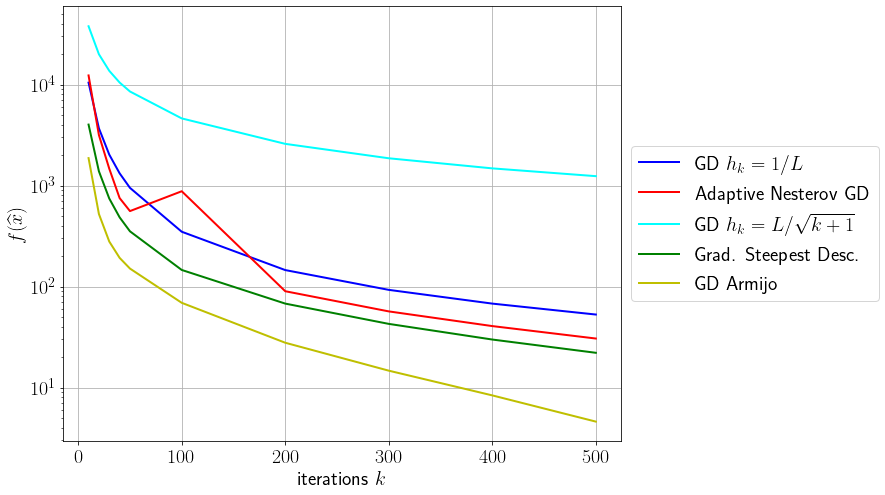

In [13]:
###  Iterations and f(hat(x)), where \hat{x} is the output of algorithm
### This is when we have more elements in the iteration_list
plt.rc("text", usetex=True)
plt.figure(figsize=(10, 8))
fontsize=20

plt.plot(iteration_list,resulter_GD_FixedStepSize[0], linewidth=2, label= 'GD $h_k = 1/L$', color= 'b')  
plt.plot(iteration_list,resulter_Adap_GD_Nesterov[0], linewidth=2, label= 'Adaptive Nesterov GD', color= 'r')  
plt.plot(iteration_list,resulter_GD_SequenceStepSize[0], linewidth=2,label='GD $h_k=L/\sqrt{k+1}$',color='cyan')  
plt.plot(iteration_list,resulter_GD_SteepestDescent[0], linewidth=2, label= 'Grad. Steepest Desc.', color= 'green')
plt.plot(iteration_list,resulter_GD_Armijo[0], linewidth=2, label= 'GD Armijo', color= 'y')

plt.xlabel('iterations $k$', fontsize=fontsize)
plt.ylabel('$f(\widehat{x})$', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

### set the legend under the figure
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=fontsize  )

### set the legend outside and in the right of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20 )

#plt.xscale('log')
plt.yscale('log')

plt.grid(1)

plt.show()

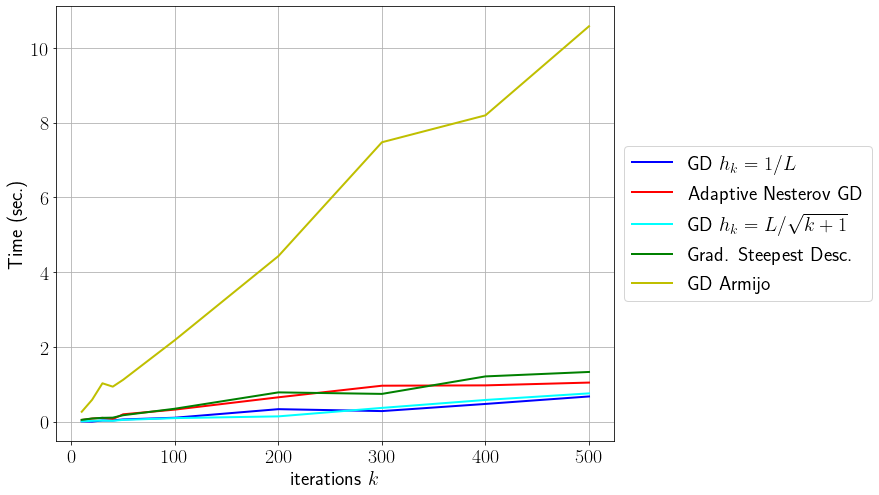

In [14]:
### Iterations and Time. This is when we have more elements in the iteration_list
plt.rc("text", usetex=True)
plt.figure(figsize=(10, 8))
fontsize=20

plt.plot(iteration_list,resulter_GD_FixedStepSize[2], linewidth=2, label= 'GD $h_k = 1/L$', color= 'b')  
plt.plot(iteration_list,resulter_Adap_GD_Nesterov[2], linewidth=2, label= 'Adaptive Nesterov GD', color= 'r')  
plt.plot(iteration_list,resulter_GD_SequenceStepSize[2], linewidth=2, label= 'GD $h_k=L/\sqrt{k+1}$',  color= 'cyan')  
plt.plot(iteration_list,resulter_GD_SteepestDescent[2], linewidth=2, label= 'Grad. Steepest Desc.', color= 'green')
plt.plot(iteration_list,resulter_GD_Armijo[2], linewidth=2, label= 'GD Armijo', color= 'y')

plt.xlabel('iterations $k$', fontsize=fontsize)
plt.ylabel('Time (sec.)', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

### set the legend under the figure
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=fontsize  )

### set the legend outside and in the right of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20 )

#plt.xscale('log')
#plt.yscale('log')

plt.grid(1)

plt.show()

In [15]:
### This is only when we have one element in the  iteration_list
iteration_list = [1000]

In [16]:
### Resulter Gradient Descent with fixed stepsize
resulter_GD_FixedStepSize=GD_FixedStepSize(obj_f=f, grad_obj_f=grad_f, init_point=x0, Lip_cons=L_f, iter_list=iteration_list)
### Resulter Adaptive Nesterov Gradient Descent
resulter_Adap_GD_Nesterov=Adap_GD_Nesterov(obj_f = f, grad_obj_f=grad_f, init_point=x0, Lip_cons=L_f, iter_list=iteration_list)
### Resulter Gradient Descent with sequences stepsize
resulter_GD_SequenceStepSize=GD_SequenceStepSize(obj_f=f,grad_obj_f=grad_f,init_point=x0,Lip_cons=L_f,iter_list=iteration_list)
### Resulter Steepest Gradient Descent
resulter_GD_SteepestDescent=GD_SteepestDescent(obj_f = f,grad_obj_f=grad_f, init_point=x0, iter_list=iteration_list)
### Resulter Gradient Descent with Armijo step size
resulter_GD_Armijo = GD_Armijo(obj_f = f, grad_obj_f=grad_f, init_point=x0, iter_list=iteration_list)

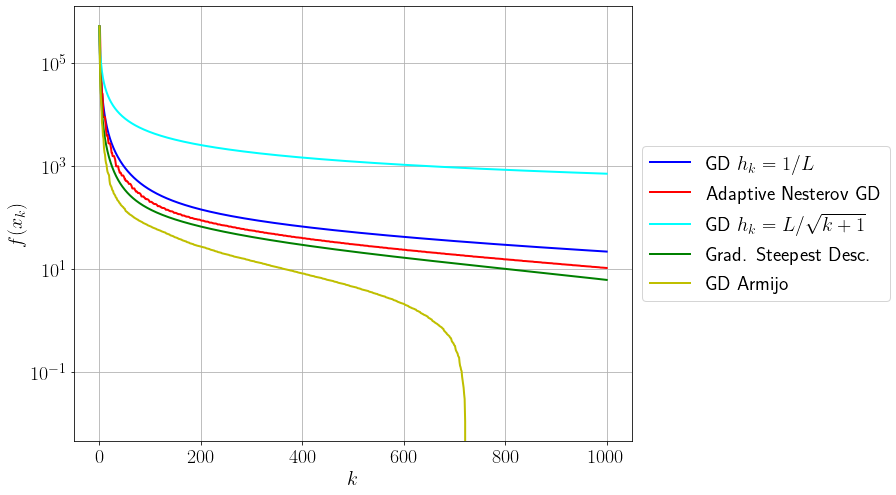

In [17]:
### Iterations and f(x_k): the value of the objective function at each iteration.
plt.rc("text", usetex=True)
plt.figure(figsize=(10, 8))
fontsize=20

plt.plot(np.arange(iteration_list[0]+1),resulter_GD_FixedStepSize[1], linewidth=2,
         label= 'GD $h_k = 1/L$', color= 'b')  
plt.plot(np.arange(iteration_list[0]+1),resulter_Adap_GD_Nesterov[1], linewidth=2,
         label= 'Adaptive Nesterov GD', color= 'r')  
plt.plot(np.arange(iteration_list[0]+1),resulter_GD_SequenceStepSize[1],linewidth=2,
         label='GD $h_k=L/\sqrt{k+1}$',color='cyan')  
plt.plot(np.arange(iteration_list[0]+1),resulter_GD_SteepestDescent[1], linewidth=2,
         label= 'Grad. Steepest Desc.',  color= 'green')
plt.plot(np.arange(iteration_list[0]+1),resulter_GD_Armijo[1], linewidth=2,
         label= 'GD Armijo',  color= 'y')

plt.xlabel('$k$', fontsize=fontsize)
plt.ylabel('$f(x_k)$', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

### set the legend under the figure
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=fontsize  )

### set the legend outside and in the right of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20 )

#plt.xscale('log')
plt.yscale('log')

plt.grid(1)

plt.show()

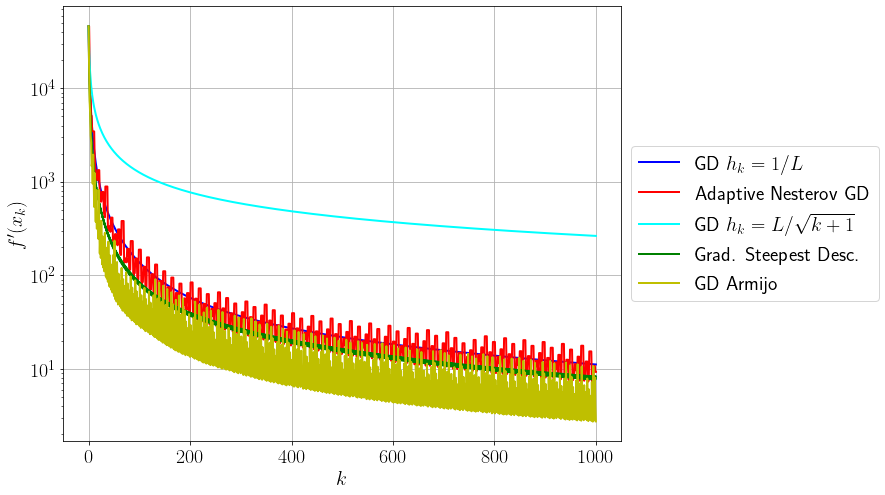

In [18]:
### Iterations and grad(f(x_k)): 
plt.rc("text", usetex=True)
plt.figure(figsize=(10, 8))
fontsize=20

plt.plot(np.arange(iteration_list[0]+1),resulter_GD_FixedStepSize[3], linewidth=2,
         label= 'GD $h_k = 1/L$', color= 'b')  
plt.plot(np.arange(iteration_list[0]+1),resulter_Adap_GD_Nesterov[3], linewidth=2,
         label= 'Adaptive Nesterov GD', color= 'r')  
plt.plot(np.arange(iteration_list[0]+1),resulter_GD_SequenceStepSize[3],linewidth=2,
         label='GD $h_k=L/\sqrt{k+1}$',color='cyan')  
plt.plot(np.arange(iteration_list[0]+1),resulter_GD_SteepestDescent[3], linewidth=2,
         label= 'Grad. Steepest Desc.',  color= 'green')
plt.plot(np.arange(iteration_list[0]+1),resulter_GD_Armijo[3], linewidth=2,
         label= 'GD Armijo',  color= 'y')

plt.xlabel('$k$', fontsize=fontsize)
plt.ylabel('$ f^{\prime}(x_k)$', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

### set the legend under the figure
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=fontsize  )

### set the legend outside and in the right of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20 )

#plt.xscale('log')
plt.yscale('log')

plt.grid(1)

plt.show()